# Quick Test

sanity-check outputs from the modern attention analysis pipeline.

In [ ]:
import json, pickle, os, math
import numpy as np
import matplotlib.pyplot as plt

# Paths (adapt if needed)
ATTN_PKL = "out/attn_token.pkl"      # or 'out/attn_word.pkl' if you pooled
PROBE_JSON = "out/probe_governor.json"
DIST_NPY = "out/js_distances.npy"


In [ ]:
# Load attention dump
with open(ATTN_PKL, "rb") as f:
    data = pickle.load(f)

print(f"Loaded {len(data)} examples from {ATTN_PKL}")
print("Keys in first item:", list(data[0].keys()))
L, H = data[0]["attns"].shape[:2]
print("Layers x Heads:", L, "x", H)
print("First example tokens:", data[0].get("tokens") or data[0].get("words"))


Loaded 2 examples from out/attn_token.pkl
Keys in first item: ['text', 'tokens', 'attns']
Layers x Heads: 12 x 12
First example tokens: ['[CLS]', 'we', 'analyze', 'attention', 'heads', '.', '[SEP]']


In [ ]:
def plot_attn_heatmap(A, xticks=None, yticks=None, title=None):
    """Plot a single attention heatmap (no style, no explicit colors)."""
    fig = plt.figure(figsize=(6, 5))
    plt.imshow(A)  # no explicit colormap per instructions
    plt.colorbar()
    if xticks is not None:
        plt.xticks(range(len(xticks)), xticks, rotation=90)
    if yticks is not None:
        plt.yticks(range(len(yticks)), yticks)
    if title:
        plt.title(title)
    plt.tight_layout()
    plt.show()


Example 0, Layer 0, Head 0, matrix shape = (7, 7)


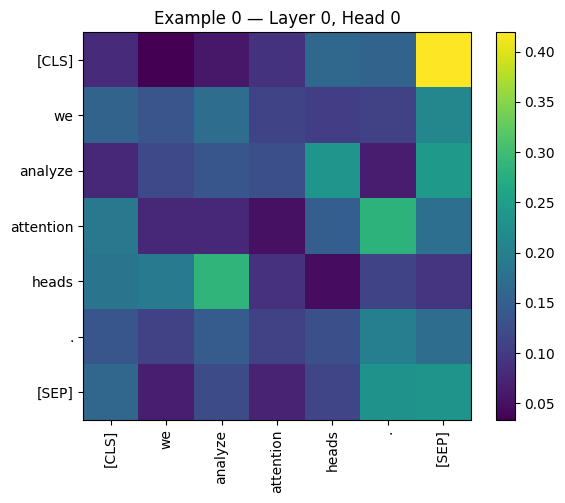

In [ ]:
# Choose indices
ex_i = 0
layer = 0
head = 0

A = data[ex_i]["attns"][layer, head]  # (T,T) or (W,W)
tokens = data[ex_i].get("tokens") or data[ex_i].get("words")
print(f"Example {ex_i}, Layer {layer}, Head {head}, matrix shape = {A.shape}")
plot_attn_heatmap(A, xticks=tokens, yticks=tokens, title=f"Example {ex_i} — Layer {layer}, Head {head}")


In [ ]:
# Load probe results
if os.path.exists(PROBE_JSON):
    with open(PROBE_JSON, "r", encoding="utf-8") as f:
        probe = json.load(f)
    mean_acc = np.array(probe["mean_accuracy"])
    print("Probe examples:", probe["n_examples"])
    print("Probe score shape:", mean_acc.shape)  # (L,H)
else:
    mean_acc = None
    print("Probe JSON not found. Run probes.py first to compute governor hit rates.")

Probe examples: 2
Probe score shape: (12, 12)
